In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [56]:
img = cv2.imread('image.jpg')

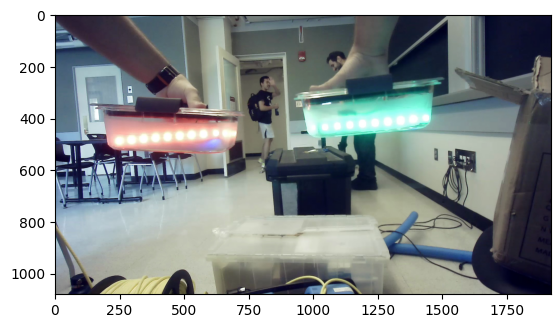

In [57]:
plt.imshow(img)

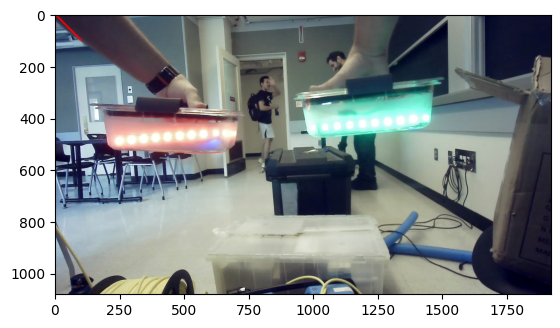

In [58]:
cv2.line(img, (0,0), (100,100), (255,0,0), 5)
plt.imshow(img)

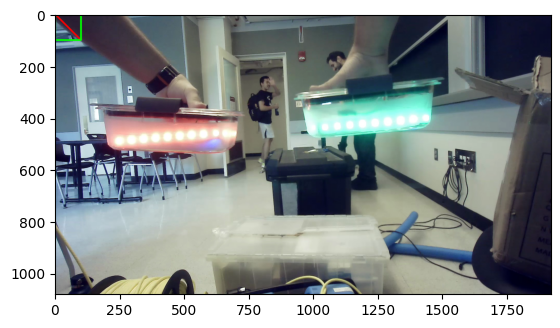

In [5]:
cv2.rectangle(img, (0,0), (100,100), (0,255,0), 5)
plt.imshow(img)

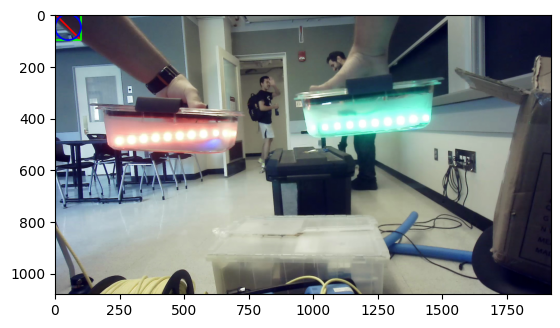

In [6]:
cv2.circle(img, (50,50), 50, (0,0,255), 5)
plt.imshow(img)

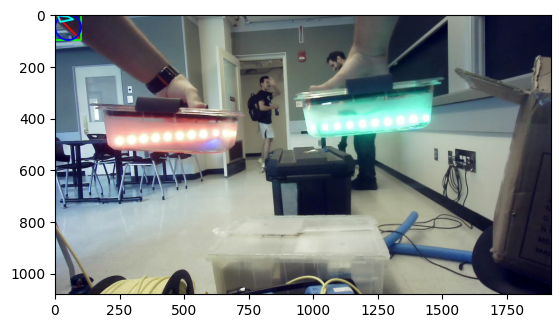

In [7]:
pts = np.array([[10,5], [20,30], [70,20], [50,10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0,255,255), 5)
plt.imshow(img)

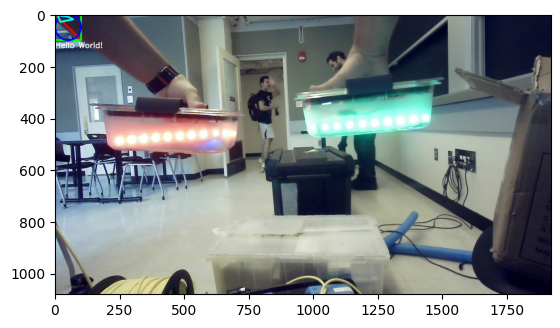

In [8]:
cv2.putText(img, 'Hello World!', (0,130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
plt.imshow(img)

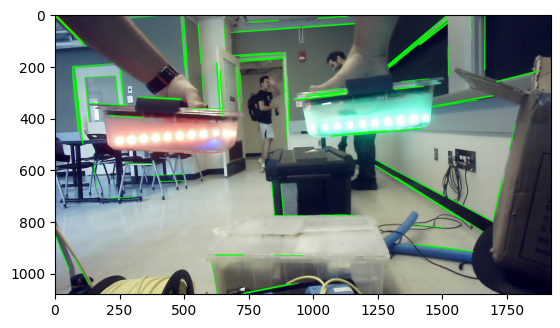

In [60]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(
    edges,
    1,
    np.pi/180,
    100,
    minLineLength=100,
    maxLineGap=10,
)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

In [78]:
pool = cv2.imread('pool.jpg')
graypool = cv2.cvtColor(pool, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(graypool, 70, 120, apertureSize=3)
lines = cv2.HoughLinesP(
    edges,
    1,
    np.pi/180,
    40,
    minLineLength=50,
    maxLineGap=90,
)

for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y1-y2) / (x1 - x2)
    if np.abs(slope) > 1.5:
        cv2.line(pool, (x1, y1), (x2, y2), (0, 255, 0), 2)
        print(f'Slope is {slope}')

plt.imshow(pool)


TypeError: 'NoneType' object is not iterable

In [ ]:

for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y1-y2) / (x1 - x2)
    if np.abs(slope) > 1.5:
        cv2.line(pool, (x1, y1), (x2, y2), (0, 255, 0), 2)
        print(f'Slope is {slope}')

plt.imshow(pool)



In [11]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

vcap = cv2.VideoCapture("rtsp://10.29.17.108:8554/test")
ret, frame = vcap.read()

plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

[ERROR:0@44.047] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): rtsp://10.29.17.108:8554/test in function 'icvExtractPattern'




error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [12]:
from dt_apriltags import Detector

In [13]:
img2 = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

In [14]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

In [15]:
tags = at_detector.detect(img2, estimate_tag_pose=False, camera_params=None, tag_size=None)

In [16]:
color_img = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)

In [17]:
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))

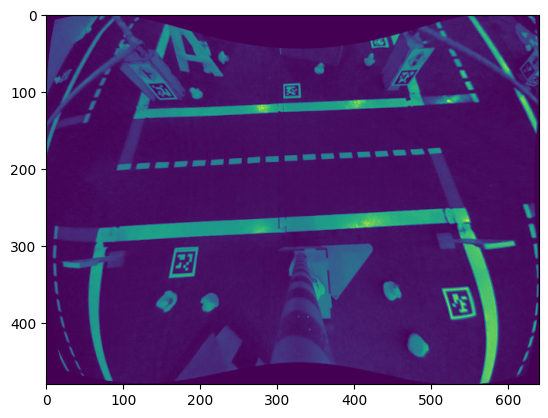

In [18]:
plt.imshow(img2)

In [19]:
cap = cv2.VideoCapture('AUV_Vid.mkv')

In [53]:
def drawLines(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(graypool, 100, 240, apertureSize=3)
    lines = cv2.HoughLinesP(
        edges,
        1,
        np.pi/180,
        5,
        minLineLength=250,
        maxLineGap=150,
    )
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 5, minLineLength=250, maxLineGap=150) # detect lines

    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        print ((y2-y1)/(x2-x1))
    #print (x1)

    plt.imshow(img)


In [ ]:

    for line in lines:
        x1, y1, x2, y2 = line[0]
        if x1 - x2 == 0:
            cv2.line(pool, (x1, y1), (x2, y2), (0, 255, 0), 2)
        else:
            slope = (y1-y2) / (x1 - x2)
            if np.abs(slope) > 1.5:
                cv2.line(pool, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(pool)

In [49]:
def drawLines_dev(img):
    graypool = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(graypool, 50, 50, apertureSize=3)
    lines = cv2.HoughLinesP(
        edges,
        1,
        np.pi/180,
        100,
        minLineLength=300,
        maxLineGap=30,
    )

    for line in lines:
        x1, y1, x2, y2 = line[0]

        cv2.line(pool, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(pool)

In [50]:
ret, frame = cap.read()


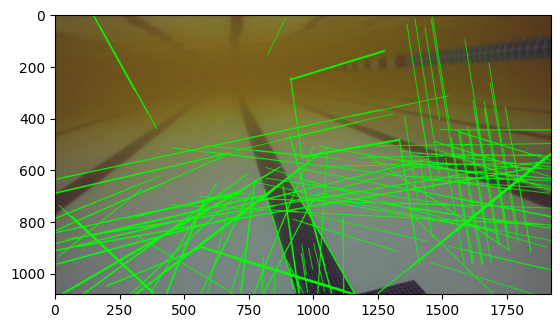

In [51]:
count = 0
frequency = 100
while ret:
    if count % frequency == 0:
        drawLines_dev(frame)
    count += 1
    ret, frame = cap.read()
    